### 1. Properties of the mean

In [1]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import pylab as pl
import numpy as np

In [2]:
not_symmetric = make_array(2,3,3,9)
np.average(not_symmetric)

4.25

In [3]:
np.mean(not_symmetric)

4.25

In [4]:
zero_one = make_array(1,1,1,0)
sum(zero_one)

3

In [5]:
np.mean(zero_one)

0.75

In [6]:
np.mean(make_array(True, True, False, True))

0.75

In [7]:
same_distribution = make_array(2,2,3,3,3,3,9,9)
np.mean(same_distribution)

4.25

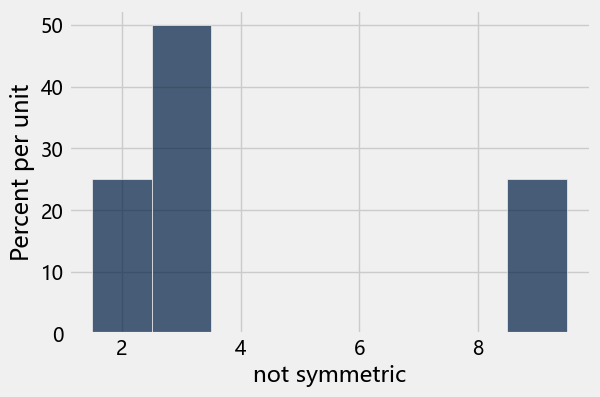

In [8]:
t1 = Table().with_column('not symmetric', not_symmetric)
t1.hist(bins = np.arange(1.5, 9.6, 1))

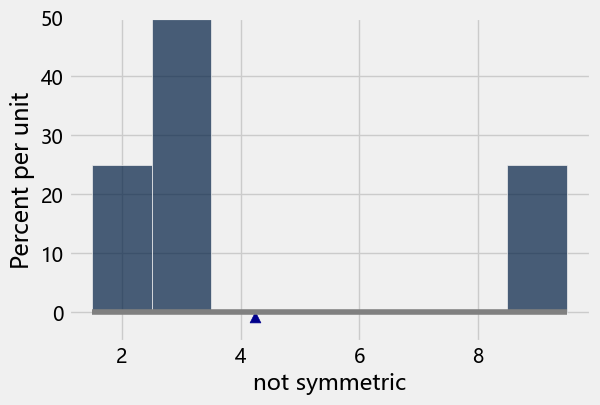

In [9]:
mean_ns = np.mean(not_symmetric)
t1.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_ns, -0.009, marker='^', color='darkblue', s=60)
plots.plot([1.5, 9.5], [0, 0], color='grey')
plots.ylim(-0.05, 0.5);

In [10]:
symmetric = make_array(2,3,3,4)

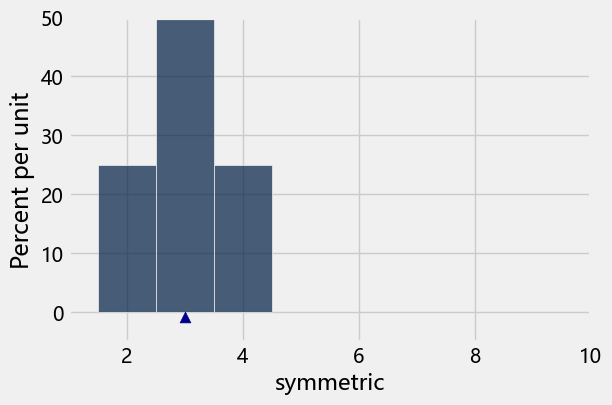

In [11]:
t2 = Table().with_column('symmetric', symmetric)
mean_s = np.mean(symmetric)
t2.hist(bins=np.arange(1.5, 4.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.xlim(1, 10)
plots.ylim(-0.05, 0.5);

In [12]:
np.mean(symmetric)

3.0

In [13]:
percentile(50, symmetric)

3

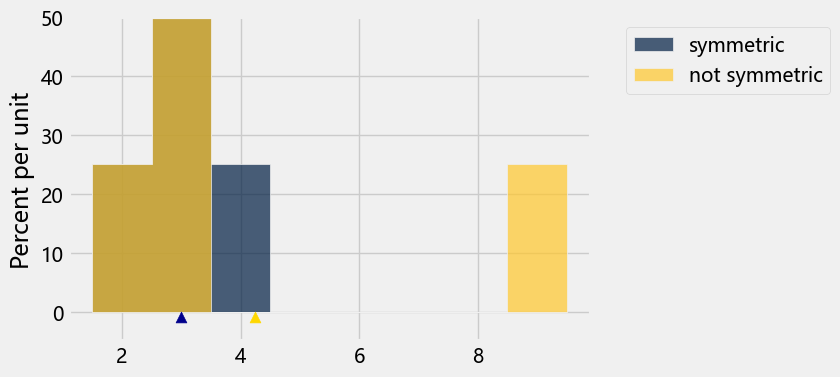

In [16]:
t3 = t2.with_column('not symmetric', not_symmetric)
t3.hist(bins=np.arange(1.5, 9.6, 1))
plots.scatter(mean_s, -0.009, marker='^', color='darkblue', s=60)
plots.scatter(mean_ns, -0.009, marker='^', color='gold', s=60)
plots.ylim(-0.05, 0.5);

c:\Users\Skywalker\AppData\Local\Programs\Python\Python310\lib\site-packages\datascience\tables.py:5865: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


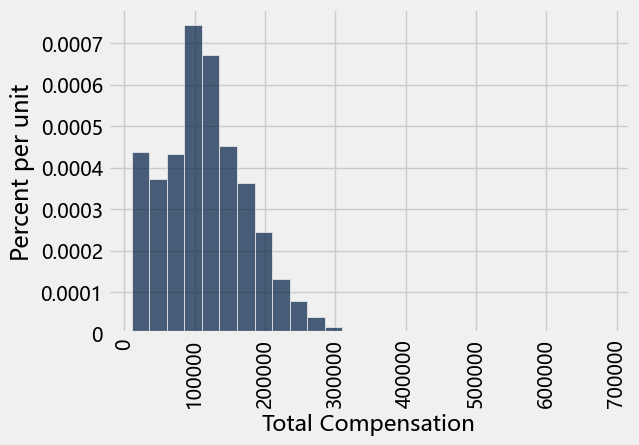

In [19]:
sf2015 = Table.read_table(path_data + 'san_francisco_2015.csv').where('Salaries', are.above(10000))
sf2015.select('Total Compensation').hist(bins=np.arange(10000, 700000, 25000))

In [20]:
compensation = sf2015.column('Total Compensation')
percentile(50, compensation)

110305.78999999999

In [21]:
np.mean(compensation)

114725.98411824222

### 2. Variability

In [22]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

In [23]:
any_numbers = make_array(1,2,2,10)

In [25]:
mean = np.mean(any_numbers)
mean

3.75

In [26]:
deviations = any_numbers - mean
calculation_steps = Table().with_columns('Value', any_numbers, 'Deviation', deviations)
calculation_steps

Value,Deviation
1,-2.75
2,-1.75
2,-1.75
10,6.25


In [27]:
sum(deviations)

0.0

In [28]:
np.mean(deviations)

0.0

In [29]:
squared_deviations = deviations ** 2
calculation_steps = calculation_steps.with_column('Squared Deviation', squared_deviations)
calculation_steps

Value,Deviation,Squared Deviation
1,-2.75,7.5625
2,-1.75,3.0625
2,-1.75,3.0625
10,6.25,39.0625


In [30]:
variance = np.mean(squared_deviations)
variance

13.1875

In [31]:
sd = variance ** 0.5
sd

3.6314597615834874

In [32]:
np.std(any_numbers)

3.6314597615834874

In [34]:
nba13 = Table.read_table(path_data + 'nba2013.csv')
nba13

Name,Position,Height,Weight,Age in 2013
DeQuan Jones,Guard,80,221,23
Darius Miller,Guard,80,235,23
Trevor Ariza,Guard,80,210,28
James Jones,Guard,80,215,32
Wesley Johnson,Guard,79,215,26
Klay Thompson,Guard,79,205,23
Thabo Sefolosha,Guard,79,215,29
Chase Budinger,Guard,79,218,25
Kevin Martin,Guard,79,185,30
Evan Fournier,Guard,79,206,20


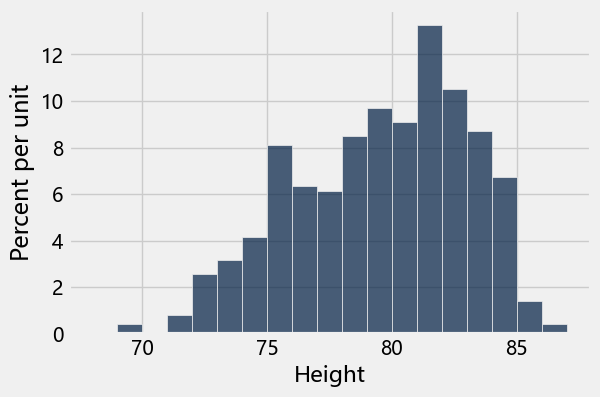

In [35]:
nba13.hist('Height', bins=np.arange(68, 88, 1))

In [36]:
mean_height = np.mean(nba13.column('Height'))
mean_height

79.065346534653472

In [37]:
sd_height = np.std(nba13.column('Height'))
sd_height

3.4505971830275546

In [38]:
nba13.sort('Height', descending=True).show(5)

Name,Position,Height,Weight,Age in 2013
Hasheem Thabeet,Center,87,263,26
Roy Hibbert,Center,86,278,26
Alex Len,Center,85,255,20
Rudy Gobert,Center,85,235,21
Meyers Leonard,Center,85,250,21


In [39]:
87 - mean_height

7.9346534653465284

In [40]:
(87 - mean_height) / sd_height

2.2995015194397923

In [41]:
nba13.sort('Height').show(5)

Name,Position,Height,Weight,Age in 2013
Isaiah Thomas,Guard,69,185,24
Nate Robinson,Guard,69,180,29
John Lucas III,Guard,71,157,30
Ty Lawson,Guard,71,195,25
Shane Larkin,Guard,71,176,20


In [42]:
(69 - mean_height) / sd_height

-2.9169868288775844

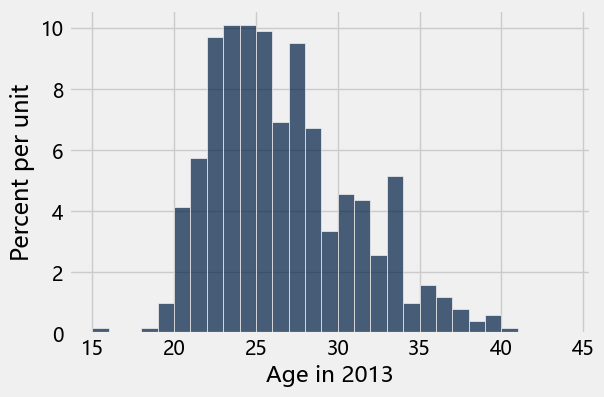

In [43]:
nba13.select('Age in 2013').hist(bins=np.arange(15, 45, 1))

In [44]:
ages = nba13.column('Age in 2013')
mean_age = np.mean(ages)
sd_age = np.std(ages)
mean_age, sd_age

(26.19009900990099, 4.3212004417203067)

In [45]:
nba13.sort('Age in 2013', descending=True).show(5)

Name,Position,Height,Weight,Age in 2013
Juwan Howard,Forward,81,250,40
Steve Nash,Guard,75,178,39
Derek Fisher,Guard,73,210,39
Marcus Camby,Center,83,235,39
Ray Allen,Guard,77,205,38


In [46]:
(40 - mean_age) / sd_age

3.1958482778922357

In [47]:
def standard_units(numbers_array):
    """Convert any array of numbers to standard units."""
    return (numbers_array - np.mean(numbers_array)) / np.std(numbers_array)

In [48]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united = united.with_column('Delay(Standard Units)', standard_units(united.column('Delay')))
united

Date,Flight Number,Destination,Delay,Delay(Standard Units)
6/1/15,73,HNL,257,6.08766
6/1/15,217,EWR,28,0.287279
6/1/15,237,STL,-3,-0.497924
6/1/15,250,SAN,0,-0.421937
6/1/15,267,PHL,64,1.19913
6/1/15,273,SEA,-6,-0.573912
6/1/15,278,SEA,-8,-0.62457
6/1/15,292,EWR,12,-0.117987
6/1/15,300,HNL,20,0.0846461
6/1/15,317,IND,-10,-0.675228


In [49]:
united.sort('Delay', descending=True)

Date,Flight Number,Destination,Delay,Delay(Standard Units)
6/21/15,1964,SEA,580,14.269
6/22/15,300,HNL,537,13.1798
6/21/15,1149,IAD,508,12.4453
6/20/15,353,ORD,505,12.3693
8/23/15,1589,ORD,458,11.1788
7/23/15,1960,LAX,438,10.6722
6/23/15,1606,ORD,430,10.4696
6/4/15,1743,LAX,408,9.91236
6/17/15,1122,HNL,405,9.83637
7/27/15,572,ORD,385,9.32979


In [50]:
within_3_sd = united.where('Delay(Standard Units)', are.between(-3, 3))
within_3_sd.num_rows / united.num_rows

0.9790235081374322

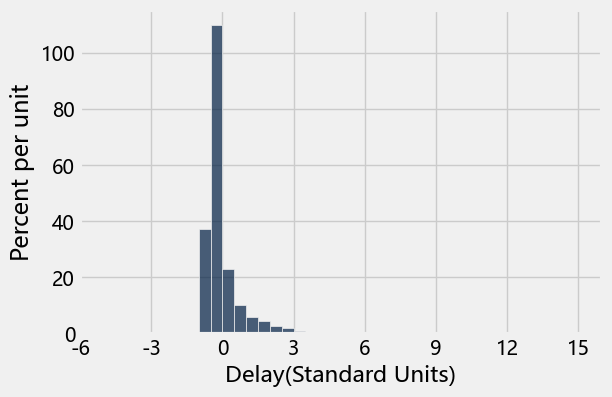

In [53]:
united.hist('Delay(Standard Units)', bins=np.arange(-5, 15.5, 0.5))
plots.xticks(np.arange(-6, 17, 3));

### 3. The SD and the Normal Curve

In [54]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np

In [55]:
baby = Table.read_table(path_data + 'baby.csv')
heights = baby.column('Maternal Height')
mean_height = np.round(np.mean(heights), 1)
mean_height

64.0

In [56]:
sd_height = np.round(np.std(heights), 1)
sd_height

2.5

([<matplotlib.axis.XTick at 0x277c8329120>,
 [Text(56.5, 0, '56.5'),
  Text(59.0, 0, '59.0'),
  Text(61.5, 0, '61.5'),
  Text(64.0, 0, '64.0'),
  Text(66.5, 0, '66.5'),
  Text(69.0, 0, '69.0'),
  Text(71.5, 0, '71.5')])

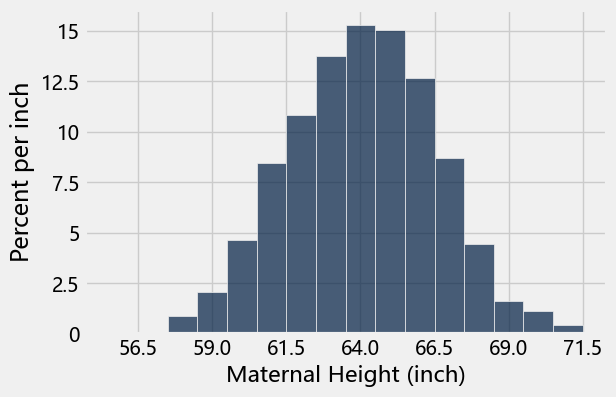

In [57]:
baby.hist('Maternal Height', bins=np.arange(55.5, 72.5, 1), unit = 'inch')
positions = np.arange(-3, 3.1, 1) * sd_height + mean_height
plots.xticks(positions)

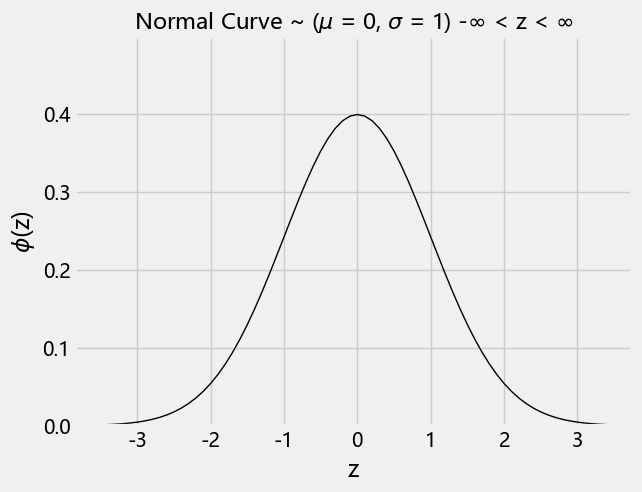

In [62]:
plot_normal_cdf()

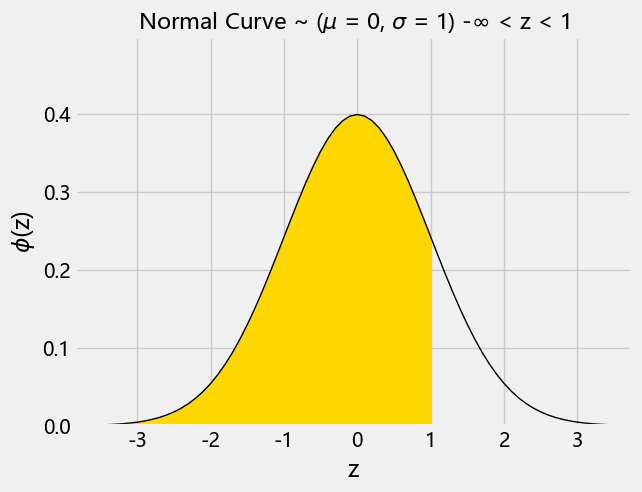

In [63]:
from scipy import stats
plot_normal_cdf(1)

In [64]:
stats.norm.cdf(1)

0.84134474606854293

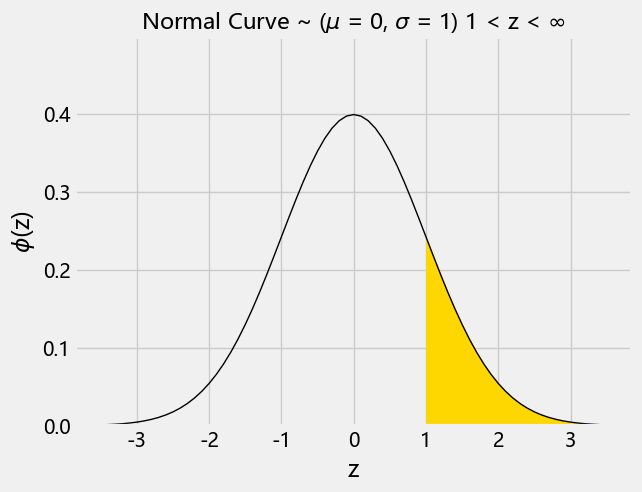

In [65]:
plot_normal_cdf(lbound = 1)

In [67]:
1 - stats.norm.cdf(1)

0.15865525393145707

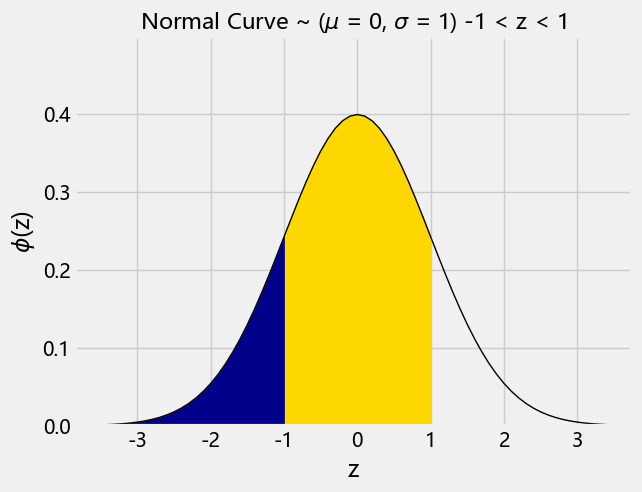

In [68]:
plot_normal_cdf(1, lbound = -1)

In [69]:
stats.norm.cdf(1) - stats.norm.cdf(-1)

0.68268949213708585

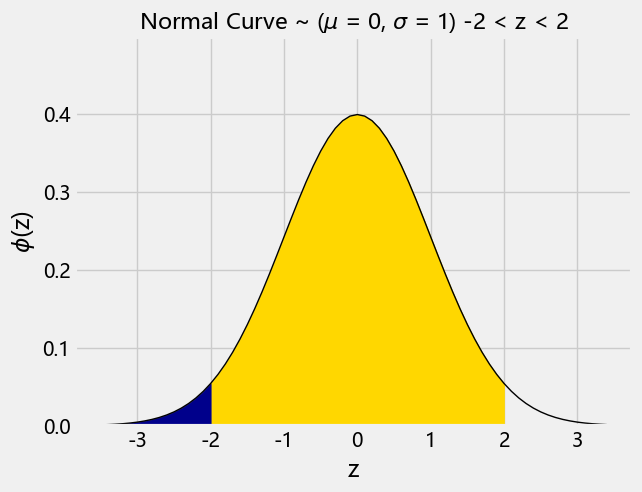

In [70]:
plot_normal_cdf(2, lbound = -2)

In [71]:
stats.norm.cdf(2) - stats.norm.cdf(-2)

0.95449973610364158

### 4. Central Limit Theorem

In [72]:
from datascience import *
%matplotlib inline
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import math
import numpy as np
from scipy import stats

In [73]:
colors = Table.read_table(path_data + 'roulette_wheel.csv').column('Color')
pockets = make_array('0','00')
for i in np.arange(1, 37):
    pockets = np.append(pockets, str(i)) 

wheel = Table().with_columns(
    'Pocket', pockets,
    'Color', colors
)
wheel

Pocket,Color
0,green
00,green
1,red
2,black
3,red
4,black
5,red
6,black
7,red
8,black


In [77]:
def red_winnings(color):
    if color == 'red':
        return 1
    else:
        return -1

In [78]:
red = wheel.with_column('Winnings: Red', wheel.apply(red_winnings, 'Color'))
red

Pocket,Color,Winnings: Red
0,green,-1
00,green,-1
1,red,1
2,black,-1
3,red,1
4,black,-1
5,red,1
6,black,-1
7,red,1
8,black,-1


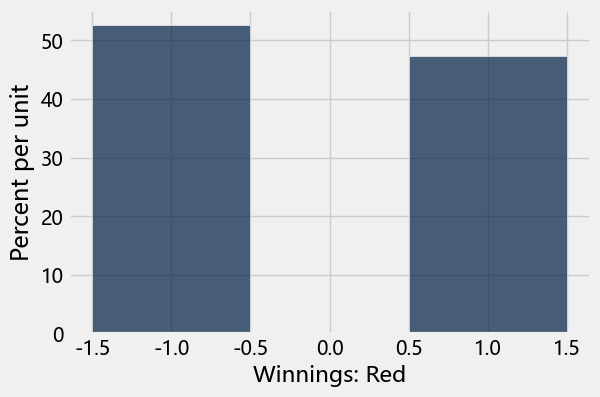

In [79]:
red.select('Winnings: Red').hist(bins=np.arange(-1.5, 1.6, 1))

In [80]:
num_bets = 400
repetitions = 10000

net_gain_red = make_array()

for i in np.arange(repetitions):
    spins = red.sample(num_bets)
    new_net_gain_red = spins.column('Winnings: Red').sum()
    net_gain_red = np.append(net_gain_red, new_net_gain_red)


results = Table().with_column('Net Gain on Red', net_gain_red)

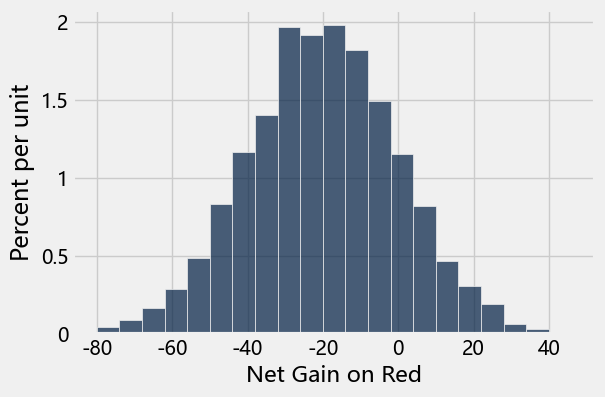

In [81]:
results.hist(bins=np.arange(-80, 50, 6))

In [82]:
average_per_bet = 1*(18/38) + (-1)*(20/38)
average_per_bet

-0.05263157894736842

In [83]:
400 * average_per_bet

-21.052631578947366

In [84]:
np.mean(results.column(0))

-21.0654

In [85]:
np.std(results.column(0))

19.904223743718315

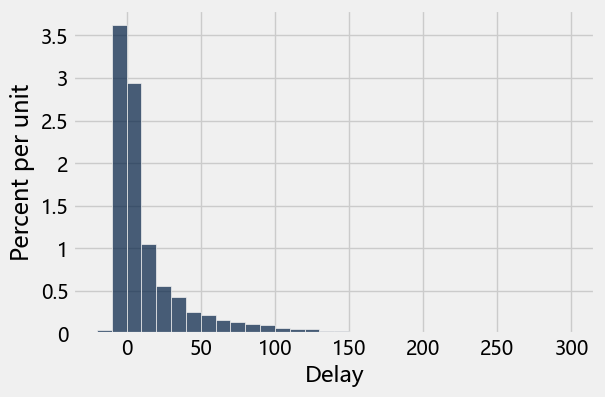

In [86]:
united = Table.read_table(path_data + 'united_summer2015.csv')
united.select('Delay').hist(bins=np.arange(-20, 301, 10))

In [87]:
mean_delay = np.mean(united.column('Delay'))
sd_delay = np.std(united.column('Delay'))
mean_delay, sd_delay

(16.658155515370705, 39.480199851609314)

In [92]:
delay = united.select('Delay')
np.mean(delay.sample(400).column('Delay'))

17.460000000000001

In [95]:
sample_size = 400
repetitions = 10000
means = make_array()

for i in np.arange(repetitions):
    new_mean = np.mean(delay.sample(sample_size).column('Delay'))
    means = np.append(means, new_mean)

results = Table().with_column('Sample Mean', means)

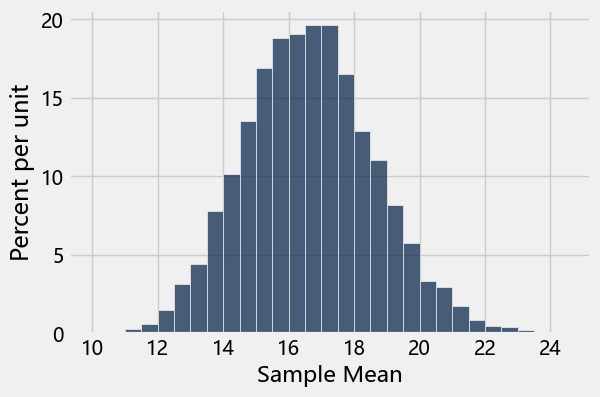

In [96]:
results.hist(bins=np.arange(10, 25, 0.5))

In [97]:
colors = make_array('Purple', 'Purple', 'Purple', 'White')
model = Table().with_column('Color', colors)
model

Color
Purple
Purple
Purple
White


In [98]:
props = make_array()

num_plants = 200
repetitions = 10000

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props = np.append(props, new_prop)
    
results = Table().with_column('Sample Proportion: 200', props)

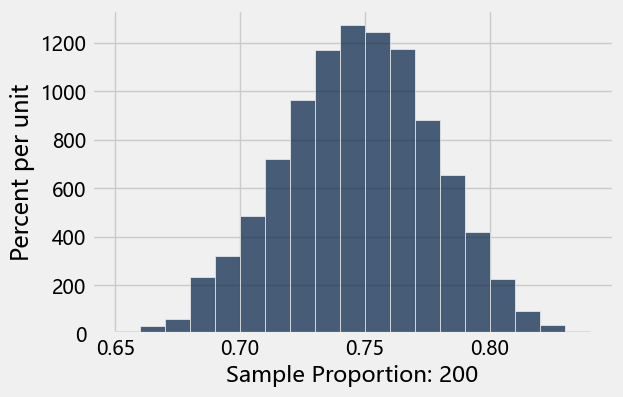

In [99]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

In [100]:
props2 = make_array()

num_plants = 800

for i in np.arange(repetitions):
    sample = model.sample(num_plants)
    new_prop = np.count_nonzero(sample.column('Color') == 'Purple')/num_plants
    props2 = np.append(props2, new_prop)
    
results = results.with_column('Sample Proportion: 800', props2)

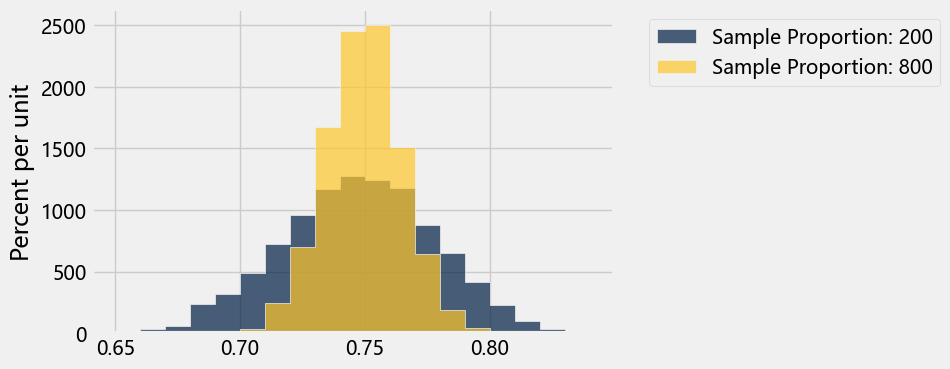

In [101]:
results.hist(bins=np.arange(0.65, 0.85, 0.01))

### 5. Variability of the Sample Mean

In [102]:
from datascience import *
import numpy as np
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [103]:
united = Table.read_table(path_data + 'united_summer2015.csv')
delay = united.select('Delay')
pop_mean = np.mean(delay.column('Delay'))
pop_mean

16.658155515370705

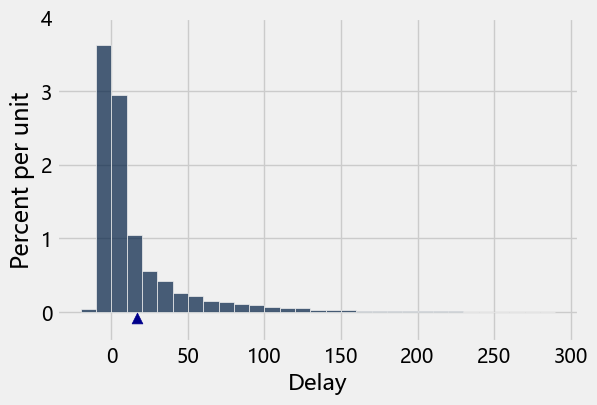

In [104]:
delay.hist(bins=np.arange(-20, 300, 10))
plots.scatter(pop_mean, -0.0008, marker='^', color='darkblue', s=60)
plots.ylim(-0.004, 0.04);

In [105]:
def simulated_sample_mean(table, label, sample_size, repetitions):
    means = make_array()
    for i in np.arange(repetitions):
        new_mean = np.mean(table.sample(sample_size).column(label))
        means = np.append(means, new_mean)
    
    sample_means = Table().with_column('Sample Mean', means)
    
    sample_means.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))
    print("Sample size: ", sample_size)
    print("Population mean:", np.mean(table.column(label)))
    print("Average of sample means: ", np.mean(means))
    print("Population SD:", np.std(table.column(label)))
    print("SD of sample means:", np.std(means))


Sample size:  100
Population mean: 16.6581555154
Average of sample means:  16.634565
Population SD: 39.4801998516
SD of sample means: 3.93973185519


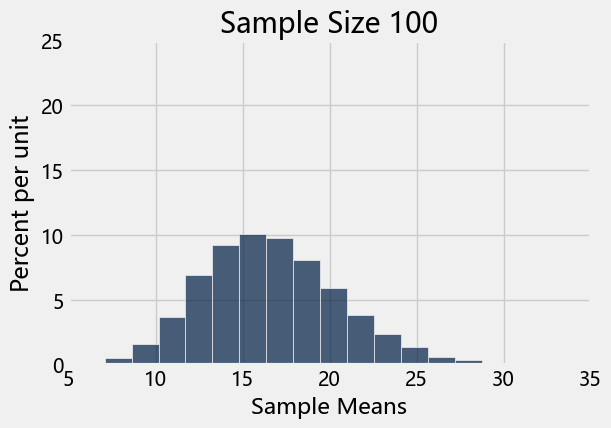

In [106]:
simulated_sample_mean(delay, 'Delay', 100, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  400
Population mean: 16.6581555154
Average of sample means:  16.6842295
Population SD: 39.4801998516
SD of sample means: 1.96415519342


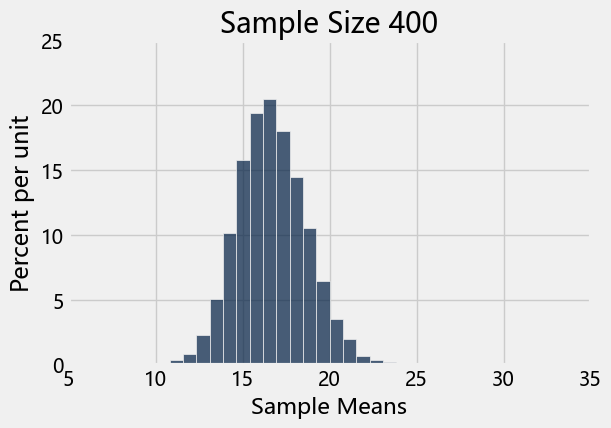

In [108]:
simulated_sample_mean(delay, 'Delay', 400, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

Sample size:  625
Population mean: 16.6581555154
Average of sample means:  16.64984608
Population SD: 39.4801998516
SD of sample means: 1.57286430139


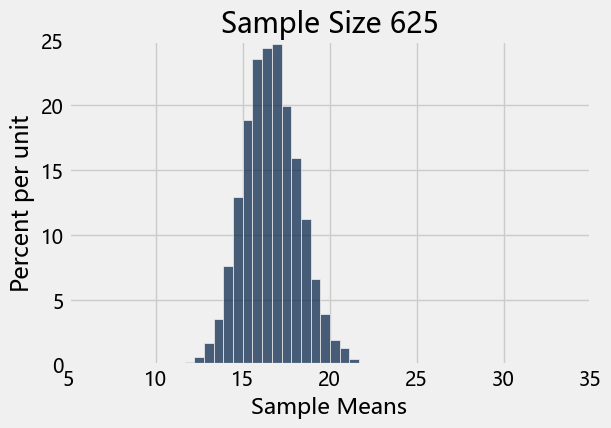

In [109]:
simulated_sample_mean(delay, 'Delay', 625, 10000)
plots.xlim(5, 35)
plots.ylim(0, 0.25);

In [110]:
pop_sd = np.std(delay.column('Delay'))
pop_sd

39.480199851609314

In [111]:
repetitions = 10000
sample_sizes = np.arange(25, 626, 25)

sd_means = make_array()

for n in sample_sizes:
    means = make_array()
    for i in np.arange(repetitions):
        means = np.append(means, np.mean(delay.sample(n).column('Delay')))
    sd_means = np.append(sd_means, np.std(means))

sd_comparison = Table().with_columns(
    'Sample Size n', sample_sizes,
    'SD of 10,000 Sample Means', sd_means,
    'pop_sd/sqrt(n)', pop_sd/np.sqrt(sample_sizes)
)

In [114]:
sd_comparison

Sample Size n,"SD of 10,000 Sample Means",pop_sd/sqrt(n)
25,7.89885,7.89604
50,5.5717,5.58334
75,4.54716,4.55878
100,3.91891,3.94802
125,3.57479,3.53122
150,3.2021,3.22354
175,3.0164,2.98442
200,2.79673,2.79167
225,2.6497,2.63201
250,2.51892,2.49695


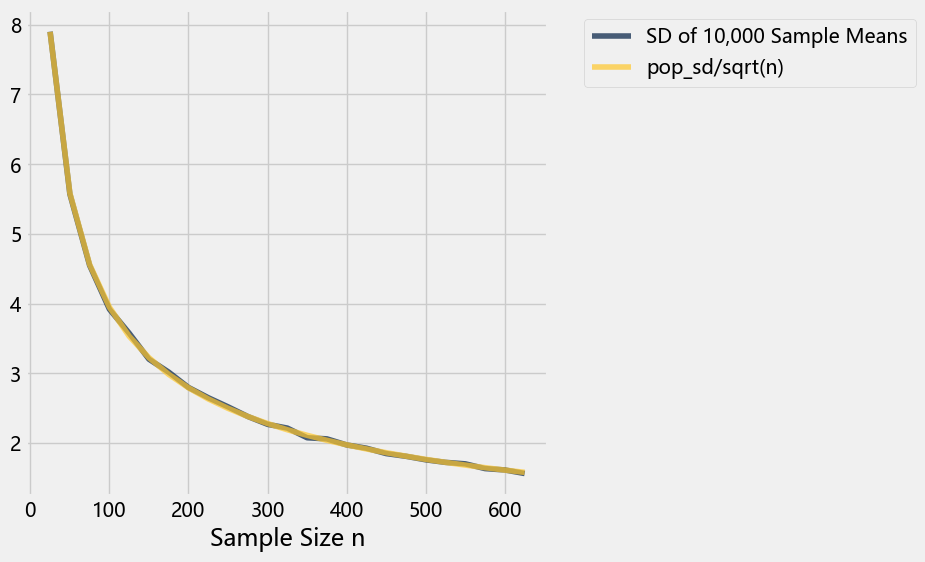

In [115]:
sd_comparison.plot('Sample Size n')

### 6. Choosing a Sample Size

In [116]:
from datascience import *
import numpy as np
path_data = 'https://raw.githubusercontent.com/Matthew-HMS/datascience_material/main/assets/data/'
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

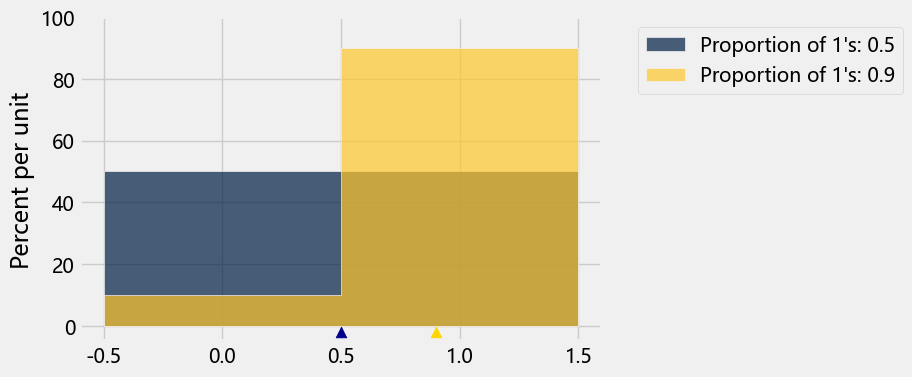

In [117]:
pop_50 = make_array(1, 1, 1, 1, 1, 0, 0, 0, 0, 0)
pop_90 = make_array(1, 1, 1, 1, 1, 1, 1, 1, 1, 0)

coins = Table().with_columns(
   "Proportion of 1's: 0.5", pop_50,
   "Proportion of 1's: 0.9", pop_90,
)
coins.hist(bins=np.arange(-0.5, 1.6, 1))
plots.scatter(0.5, -0.02, marker='^', color='darkblue', s=60)
plots.scatter(0.9, -0.02, marker='^', color='gold', s=60)
plots.ylim(-0.05, 1);

In [118]:
sd = make_array()
for i in np.arange(1, 10, 1):
    # Create an array of i 1's and (10-i) 0's
    population = np.append(np.ones(i), 1-np.ones(10-i))
    sd = np.append(sd, np.std(population))
    
zero_one_sds = Table().with_columns(
    "Population Proportion of 1's", np.arange(0.1, 1, 0.1),
    "Population SD", sd
)

zero_one_sds

Population Proportion of 1's,Population SD
0.1,0.3
0.2,0.4
0.3,0.458258
0.4,0.489898
0.5,0.5
0.6,0.489898
0.7,0.458258
0.8,0.4
0.9,0.3


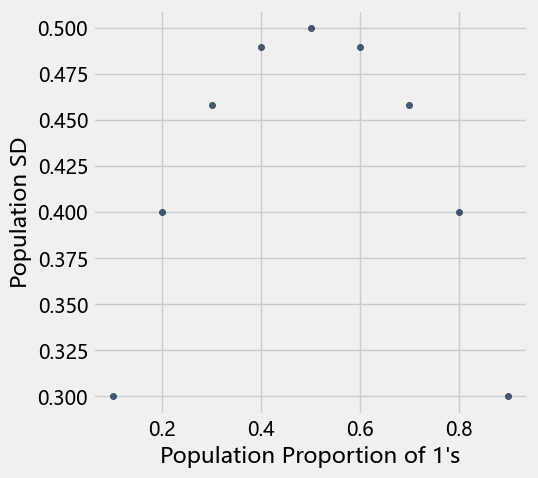

In [120]:
zero_one_sds.scatter("Population Proportion of 1's")